In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.api._v2.keras import activations


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [3]:

from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  cross_val_score



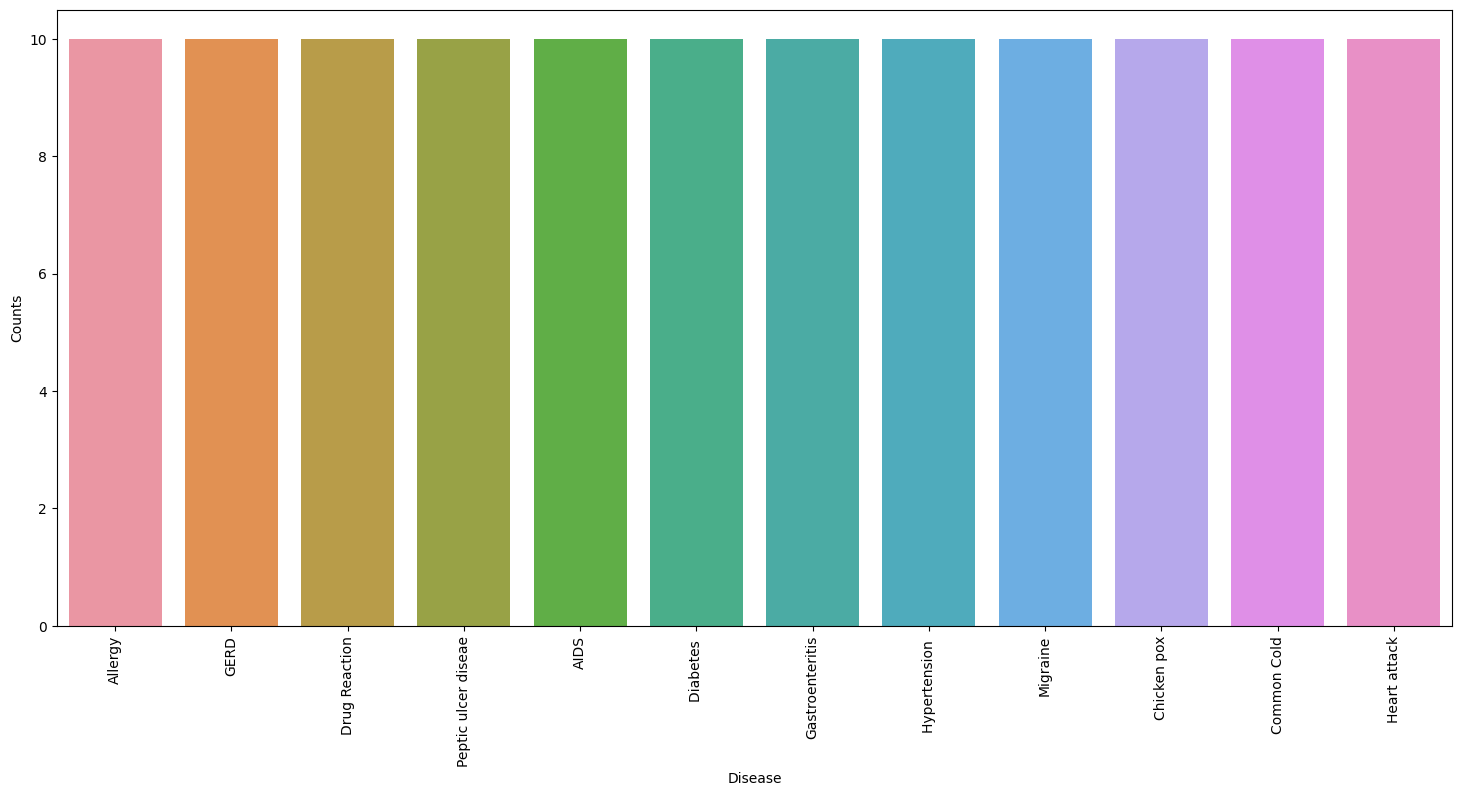

In [4]:
train=pd.read_csv('/content/Training.csv')
test=pd.read_csv('/content/Testing.csv')
data = pd.read_csv('/content/Training.csv').dropna(axis = 1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [5]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy


In [6]:
train.isna()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
train.shape

(120, 133)

In [8]:
test.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
2,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS


In [9]:
test.isna()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
test.shape

(12, 133)

In [11]:
symp=['itching','skin_rash','nodal_skin_eruptions','continuous_sneezing','shivering','chills','joint_pain',
    'stomach_pain','acidity','ulcers_on_tongue','muscle_wasting','vomiting','burning_micturition','spotting_ urination','fatigue',
    'weight_gain','anxiety','cold_hands_and_feets','mood_swings','weight_loss','restlessness','lethargy','patches_in_throat',
    'irregular_sugar_level','cough','high_fever','sunken_eyes','breathlessness','sweating','dehydration','indigestion',
    'headache','yellowish_skin','dark_urine','nausea','loss_of_appetite','pain_behind_the_eyes','back_pain','constipation',
    'abdominal_pain','diarrhoea','mild_fever','yellow_urine','yellowing_of_eyes','acute_liver_failure','fluid_overload',
    'swelling_of_stomach','swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs','fast_heart_rate',
    'pain_during_bowel_movements','pain_in_anal_region','bloody_stool','irritation_in_anus','neck_pain','dizziness','cramps',
    'bruising','obesity','swollen_legs','swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips','slurred_speech','knee_pain','hip_joint_pain',
    'muscle_weakness','stiff_neck','swelling_joints','movement_stiffness','spinning_movements','loss_of_balance','unsteadiness','weakness_of_one_body_side',
    'loss_of_smell','bladder_discomfort','foul_smell_of urine','continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain','abnormal_menstruation','dischromic _patches',
    'watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum','rusty_sputum','lack_of_concentration','visual_disturbances',
    'receiving_blood_transfusion','receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen','history_of_alcohol_consumption',
    'fluid_overload','blood_in_sputum','prominent_veins_on_calf','palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose','yellow_crust_ooze']

In [12]:
disease=['Allergy','GERD','Drug Reaction',
        'Peptic ulcer diseae','AIDS','Diabetes','Gastroenteritis','Hypertension',
        ' Migraine''Chicken pox','Common Cold','Heartattack']

In [13]:
l=[]
for x in range(0,len(symp)):
    l.append(0)


In [14]:
tr=pd.read_csv("/content/Testing.csv")
tr.replace({'prognosis':{'Allergy':0,'GERD':1,'Drug Reaction':2,'Peptic ulcer diseae':3,'AIDS':4, 'Diabetes ':5,'Gastroenteritis':6,'Hypertension ':7,
'Migraine':8,'Chicken pox':9,
'Common Cold':10,'Heart attack':11}},inplace=True)

In [15]:
X_test= tr.drop('prognosis',axis=1)
y_test = tr[["prognosis"]]
np.ravel(y_test)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [16]:
df=pd.read_csv("/content/Training.csv")
df.replace({'prognosis':{'Allergy':0,'GERD':1,'Drug Reaction':2,'Peptic ulcer diseae':3,'AIDS':4,'Diabetes ':5,'Gastroenteritis':6,'Hypertension ':7, 'Migraine':8,'Chicken pox':9, 'Common Cold':10,'Heart attack':11}},inplace=True)
X = df.drop(['prognosis'], axis = 1)
y = df.prognosis.values
np.ravel(y)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11])

In [17]:
s1= input("enter first symp:")
print(s1)

s2= input("enter 2nd symp:")
print(s2)


enter first symp:itching
itching
enter 2nd symp:skin_rash
skin_rash


In [18]:
user_symptoms = [s1,s2]

In [19]:
for k in range(0,len(symp)):
        for z in user_symptoms:
            if(z==symp[k]):
                l[k]=1

In [20]:
gnb = MultinomialNB()
gnb.fit(X,np.ravel(y))
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)



100.0


In [21]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression()
logistic_clf.fit(X,np.ravel(y))
y_pred = logistic_clf.predict(X_test)
print(accuracy_score(y_test, y_pred)*100)

100.0


In [22]:
coef_num= logistic_clf.coef_

In [23]:
coef_num

array([[-0.18614572, -0.17108864,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.16783114, -0.15016212,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.94429057,  0.83577026,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.51808793,  0.52430168,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08306318, -0.08039256,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.14230323, -0.13190764,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

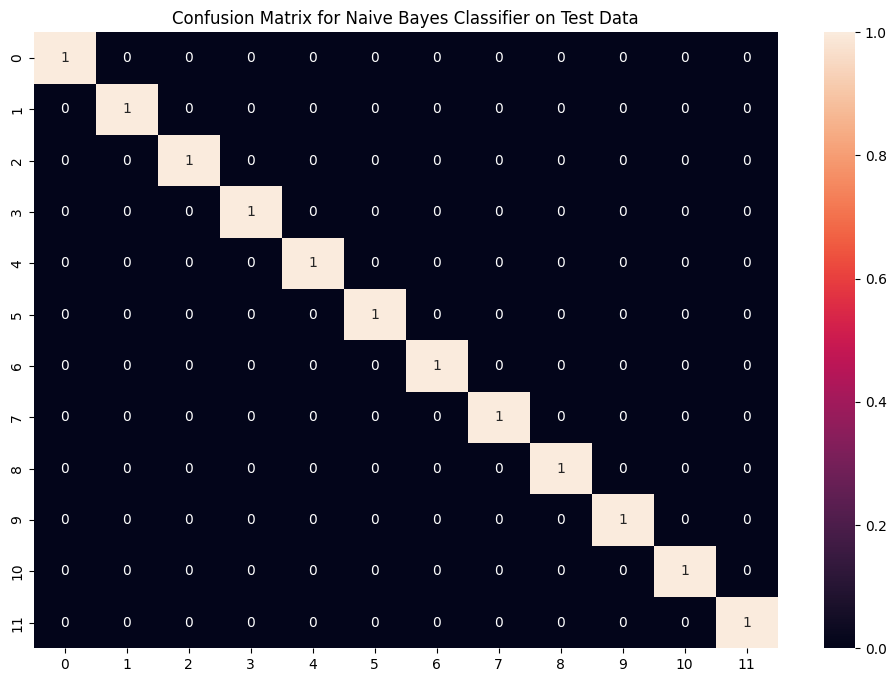

In [24]:
cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

In [25]:
list_user_symptoms = [l]
predict =gnb.predict(list_user_symptoms)
predicted=predict[0]
k='no'
for a in range(0,len(disease)):
        if(disease[predicted] == disease[a]):
            print("you may suffer from:")
            print(disease[a])
            break

you may suffer from:
Drug Reaction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [26]:
output = pd.DataFrame()
output['Expected Output'] = y_test
output['Predicted Output'] = y_pred
output.tail()


,Expected Output,Predicted Output
7,7,7
8,8,8
9,9,9
10,10,10
11,11,11


In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
model= keras.Sequential()
hidden_layer_sizes= coef_num.shape[1:]
model.add(keras.layers.Dense(units=hidden_layer_sizes[0],activation='relu',input_shape=(X.shape[1],)))
for layer_size in hidden_layer_sizes[1:]:
  model.add(keras.layers.Dense(units=layer_size,activation='relu'))

model.add(keras.layers.Dense(units=coef_num[-1].shape[0],activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 132)               17556     
                                                                 
 dense_1 (Dense)             (None, 132)               17556     
                                                                 
Total params: 35,112
Trainable params: 35,112
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X , y, epochs=100, batch_size=120)

Epoch 1/100
1/1 [==============================] - 1s 941ms/step - loss: 4.8469 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 4.7937 - accuracy: 0.0167
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 4.7406 - accuracy: 0.0167
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 4.6873 - accuracy: 0.0583
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 4.6338 - accuracy: 0.2000
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 4.5799 - accuracy: 0.3667
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 4.5256 - accuracy: 0.4417
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 4.4709 - accuracy: 0.5667
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 4.4155 - accuracy: 0.6583
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 4.3594 - accuracy: 0.7000
Epoch 11/100
1

In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
##converter.experimental_new_converter = True

tflite_model = converter.convert()

with open('symptoms.tflite', 'wb') as f:
  f.write(tflite_model)